# Q7.

In [1]:
# Standard libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Train-test and preprocessing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# For saving the figures
svfigs = False # True if you want to save figures
svdir = './figures/' # directory to save the figures
if svfigs: # set a higher resolution if saving the figures
    plt.rcParams['figure.dpi'] = 150
else:
    plt.rcParams['figure.dpi'] = 75   

# Download the data from
# https://www.kaggle.com/uciml/pima-indians-diabetes-database 
filename = '../datasets/pimaIndians/diabetes.csv'
diabetes = pd.read_csv('/Users/pan/Documents/Oxford/Yr3/HT/SB2.2 Statistical Machine Learning/pima-indians-diabetes.csv')

In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Missing values indicated by 0 - replace by nan
for name in diabetes.keys()[1:-1]:
    diabetes[name] = diabetes[name].replace({0: np.nan})
diabetes.isna().sum()
# for features other than pregnancies, 0 indicate a missing value, so replace by nan


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

In [4]:
 # remove the dimensions with large number of missing data
df = diabetes.drop(columns=['SkinThickness', 'Insulin']) 
df = df.dropna() # remove examples with missing data

# X and y data
X = df[df.keys()[0:-1]]
y = df[df.keys()[-1]]

(n,p) = X.shape
print('n =', n, ', p =', p)

n = 723 , p = 6


In [5]:
# Split training/test set
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.25, random_state=12)

# (a) 
## Pairplot

<Figure size 450x300 with 0 Axes>

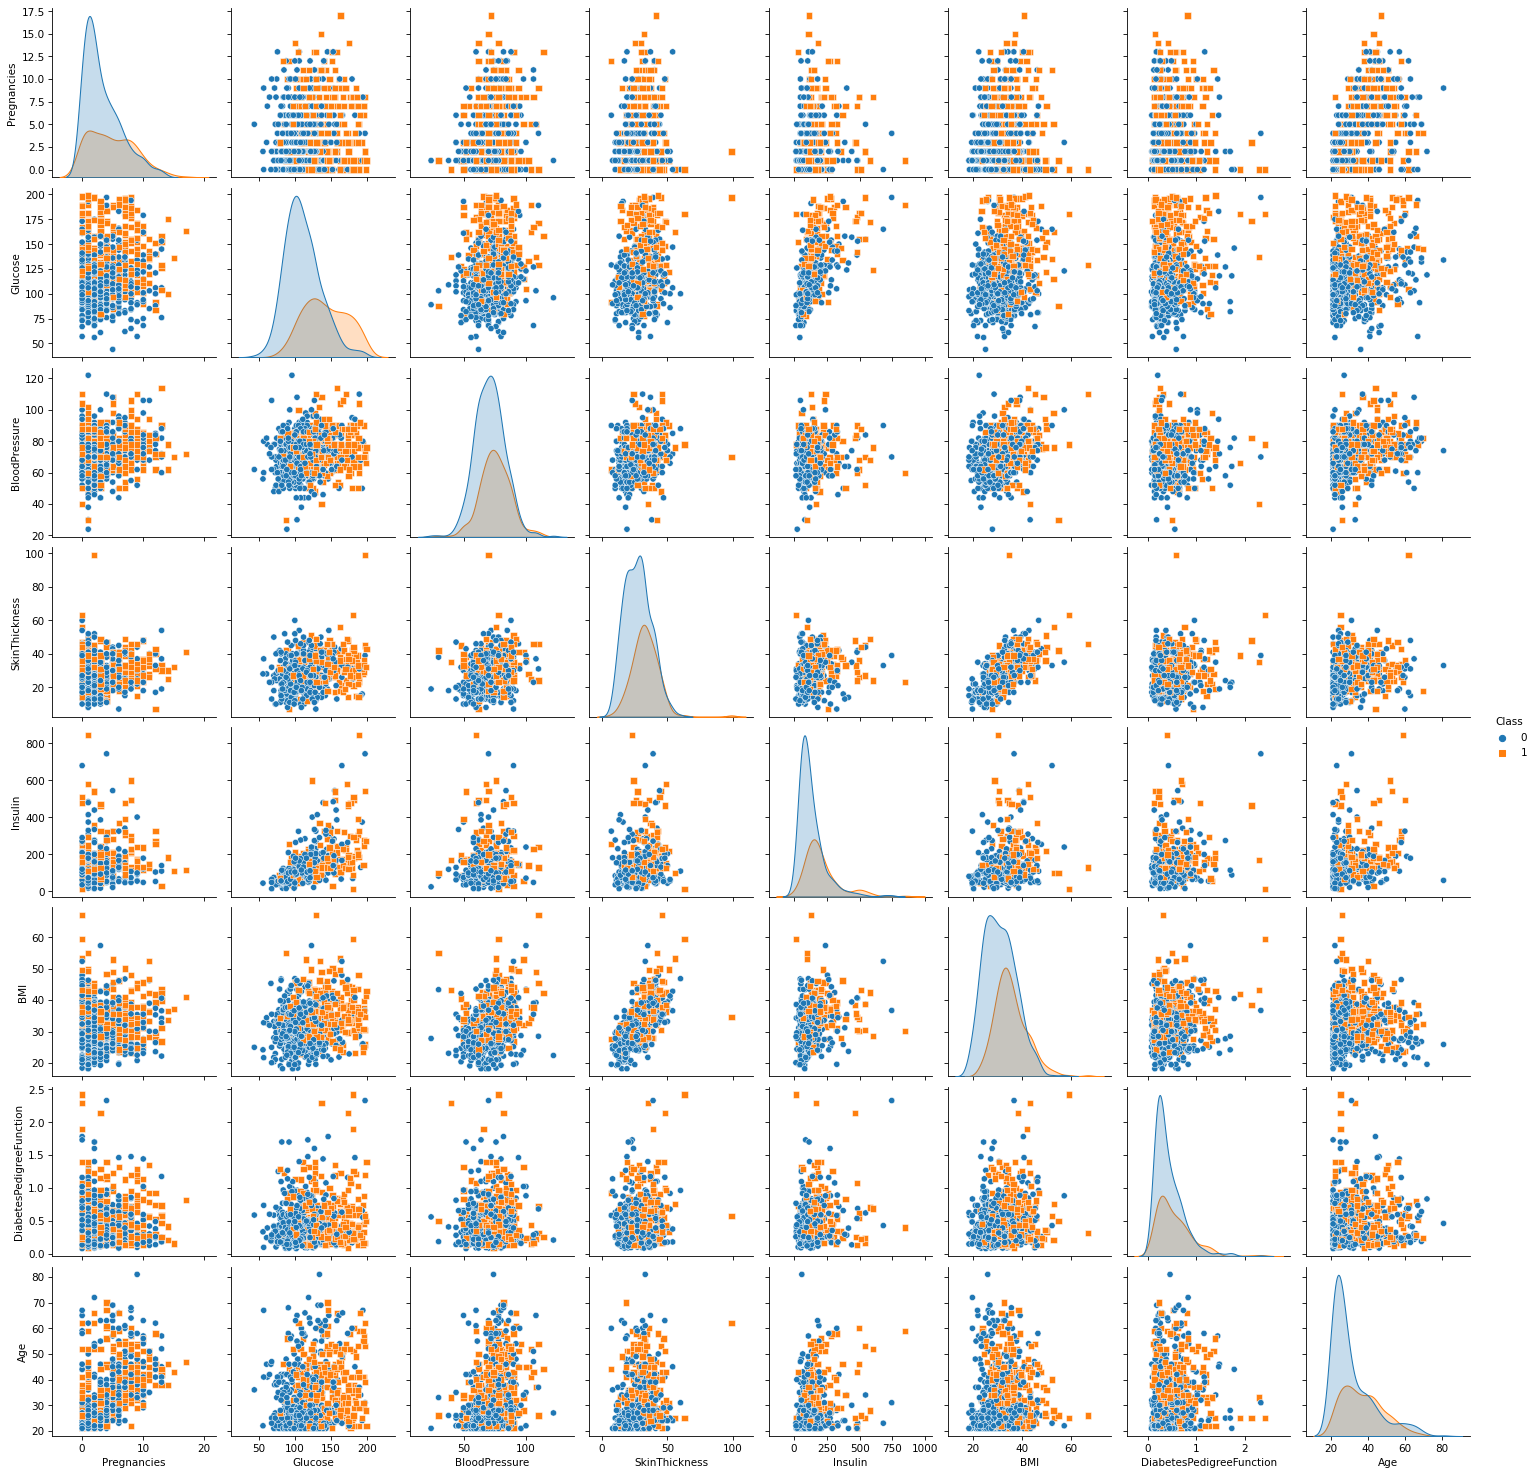

In [6]:
plt.figure();
sns.pairplot(data=diabetes,hue = 'Class', markers=["o", "s"])
if svfigs:  
    plt.savefig(svdir + 'diabetes1.png', bbox_inches = 'tight');

# (b)
## Standardise the data

In [7]:
scaler = StandardScaler()
scaled_diabetes = scaler.fit_transform(diabetes)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# (c)

## LDA

In [8]:
# Using Scikit-learn
LDAclassifier = LinearDiscriminantAnalysis()
LDAclassifier.fit(scaled_X_train, y_train)

# Predict the values on the same grid as before
ytest_lda = LDAclassifier.predict(scaled_X_test)# gives the same value as with the above function
# Plot the results (same as before)
diabetestest_lda = pd.concat([scaled_X_test, pd.DataFrame(ytest_lda, columns=['class'])], axis = 1)
plt.figure()
sns.scatterplot(data=diabestest_lda)
if svfigs:
    plt.savefig(svdir + 'diabetesLDAtest2.png', bbox_inches = 'tight')

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid